# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Load and Preview Data

In [2]:
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("shape:", df.shape)

shape: (284807, 31)


In [4]:
print("missing values:", df.isnull().sum().sum())

missing values: 0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Class Imbalance

In [6]:
counts = df['Class'].value_counts()
print(f"\nclass counts:\n{counts.to_string()}")
fraud_rate = df['Class'].mean()
print(f"fraud rate: {fraud_rate:.3%}")


class counts:
Class
0    284315
1       492
fraud rate: 0.173%


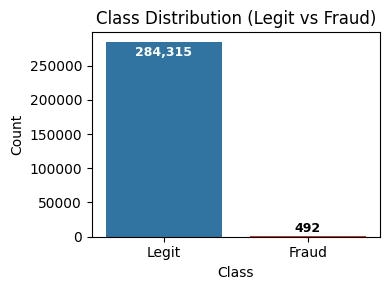

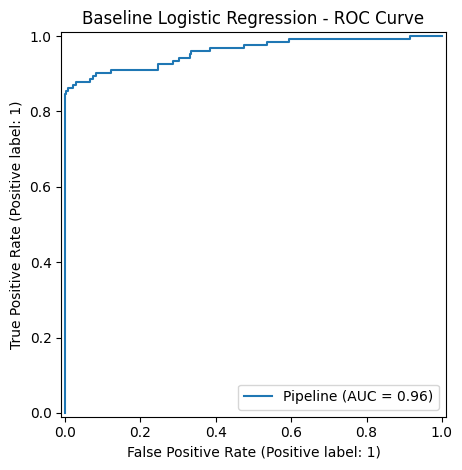

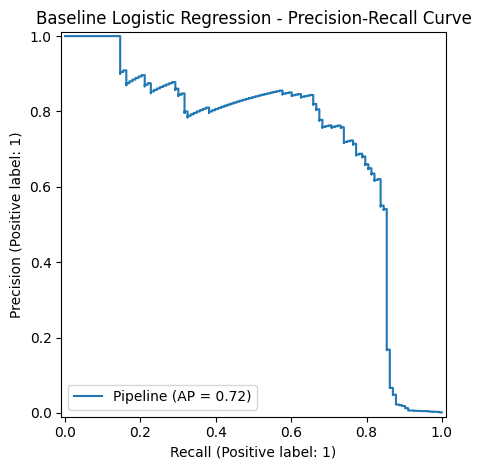

In [9]:
plt.figure(figsize=(4, 3))
ax = sns.barplot(
x=counts.index.map({0: "Legit", 1: "Fraud"}),
y=counts.values,
hue=counts.index.map({0: "Legit", 1: "Fraud"}),
palette=["#1f77b4", "#d62728"],
legend=False
)

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        if height > 100000:
            ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.98,
            f'{int(height):,}',
            ha='center',
            va='top',
            fontsize=9,
            fontweight='bold',
            color='white'
            )
        else:
            ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1500,
            f'{int(height):,}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',
            color='black'
            )

plt.title("Class Distribution (Legit vs Fraud)")
plt.ylabel("Count")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

X = df.drop(columns="Class")
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, stratify=y, random_state=42
)

baseline = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000)
).fit(X_train, y_train)

RocCurveDisplay.from_estimator(baseline, X_test, y_test)
plt.title("Baseline Logistic Regression - ROC Curve")
plt.tight_layout()
plt.show()

PrecisionRecallDisplay.from_estimator(baseline, X_test, y_test)
plt.title("Baseline Logistic Regression - Precision-Recall Curve")
plt.tight_layout()
plt.show()

# Transaction Amount Distribution

In [7]:
average_fraud_amount = df[df['Class'] == 1]['Amount'].mean()
print(f"average fraud amount: {average_fraud_amount:.2f}")

average fraud amount: 122.21


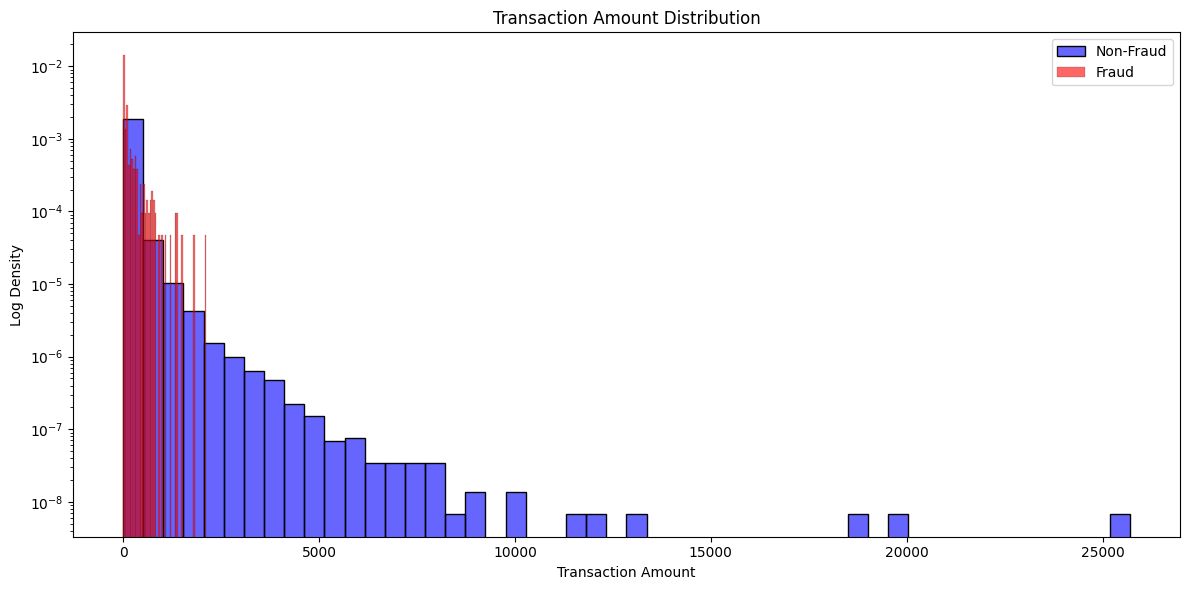

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, label="Non-Fraud", color='blue', stat='density', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, label="Fraud", color='red', stat='density', alpha=0.6)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.yscale('log')
plt.ylabel("Log Density")
plt.legend()
plt.tight_layout()
plt.show()

# Transactions by Hour of Day

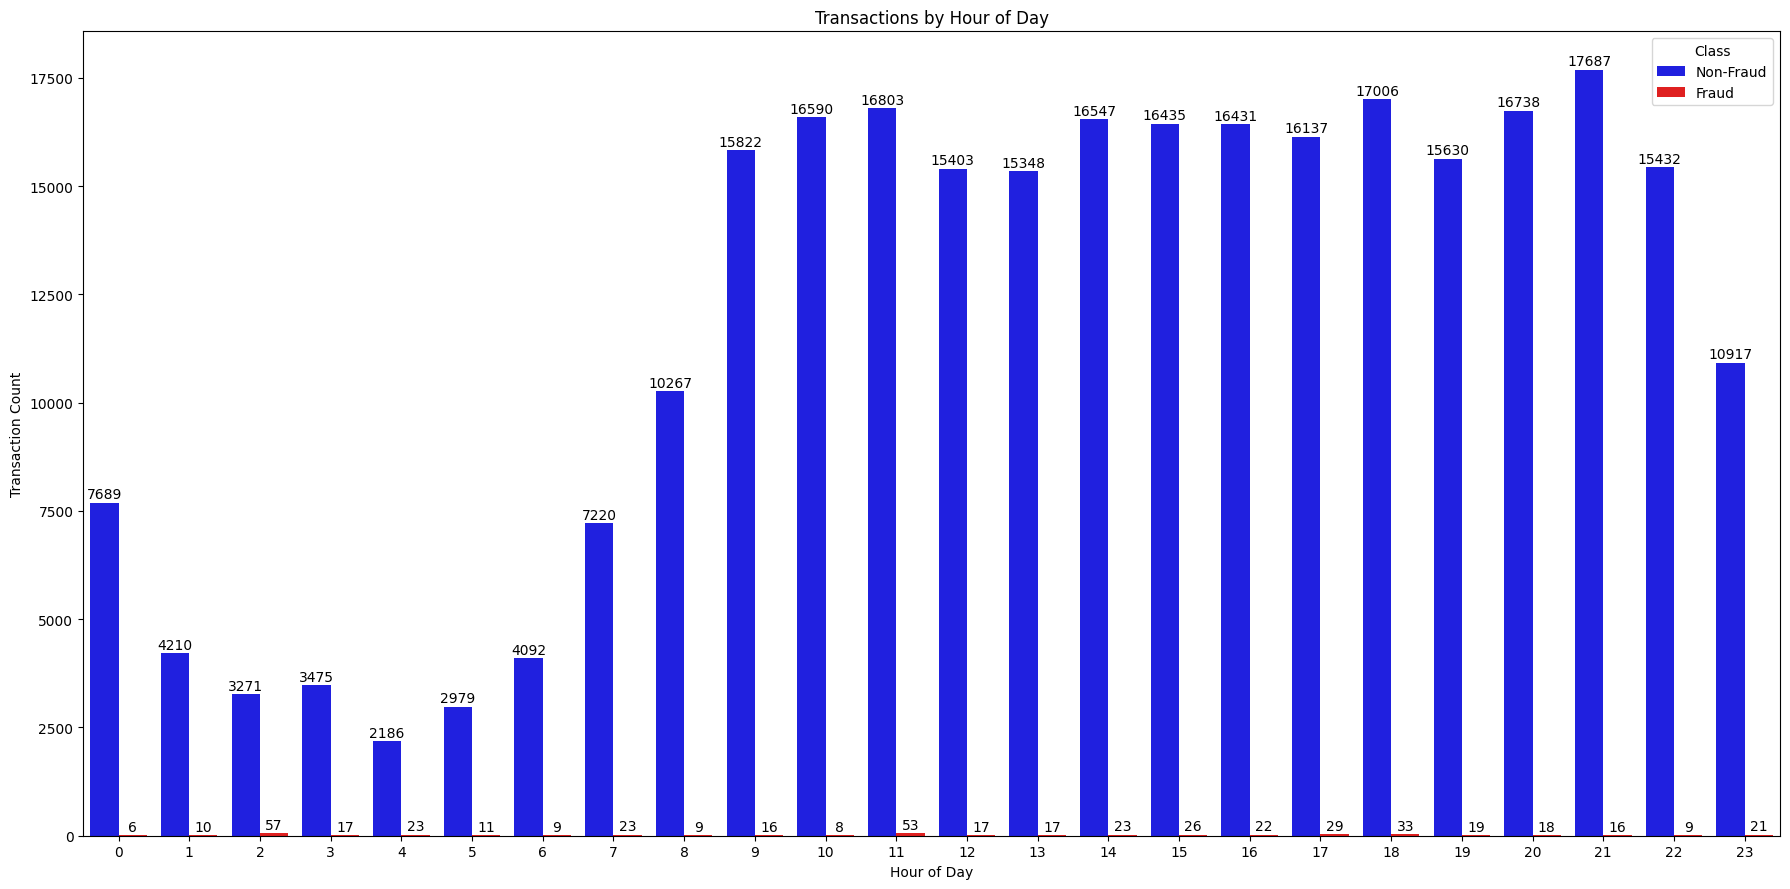

In [9]:
df['Hour'] = df['Time'] // 3600 % 24
df['Hour'] = df['Hour'].astype(int)
df['Hour'] = df['Hour'] % 24

plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Hour', data=df, hue='Class', palette={0: 'blue', 1: 'red'})
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=1)

plt.title("Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.legend(title='Class', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# Correlation Matrix

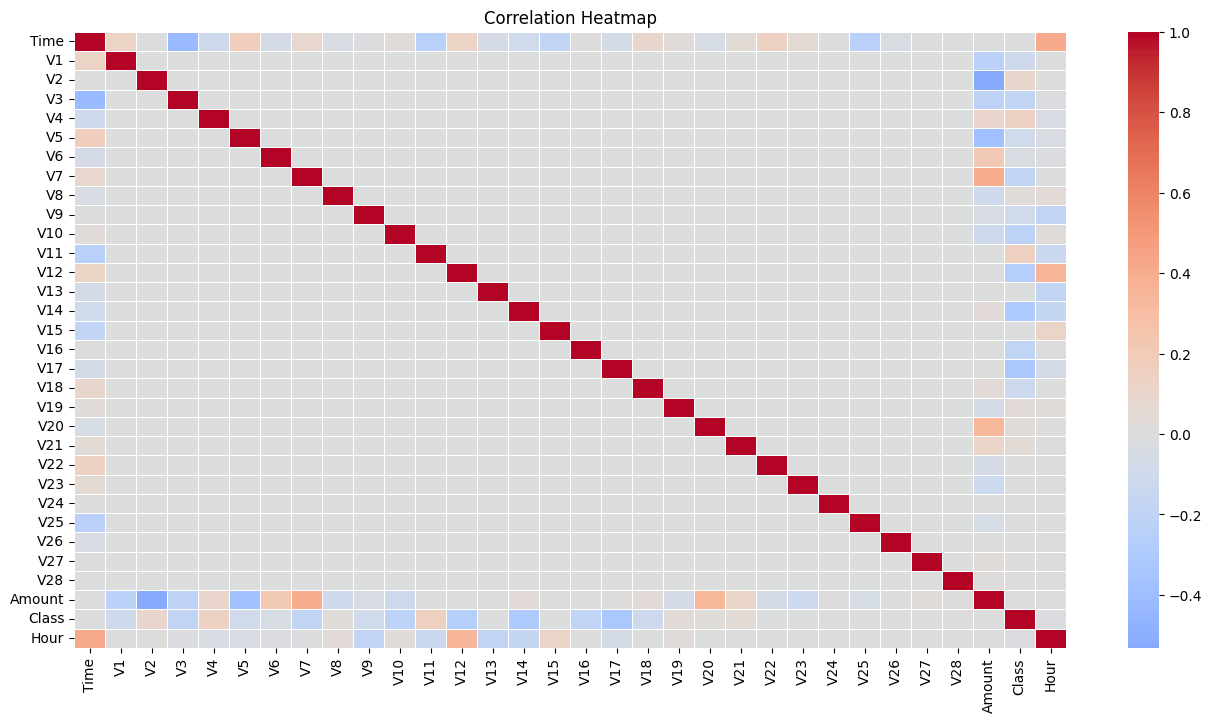

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
V18      0.111485
Name: Class, dtype: float64


In [10]:
plt.figure(figsize=(16,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

top_corr = corr['Class'].abs().sort_values(ascending=False).head(11)
print(top_corr)

# Top Features Correlation Heatmap

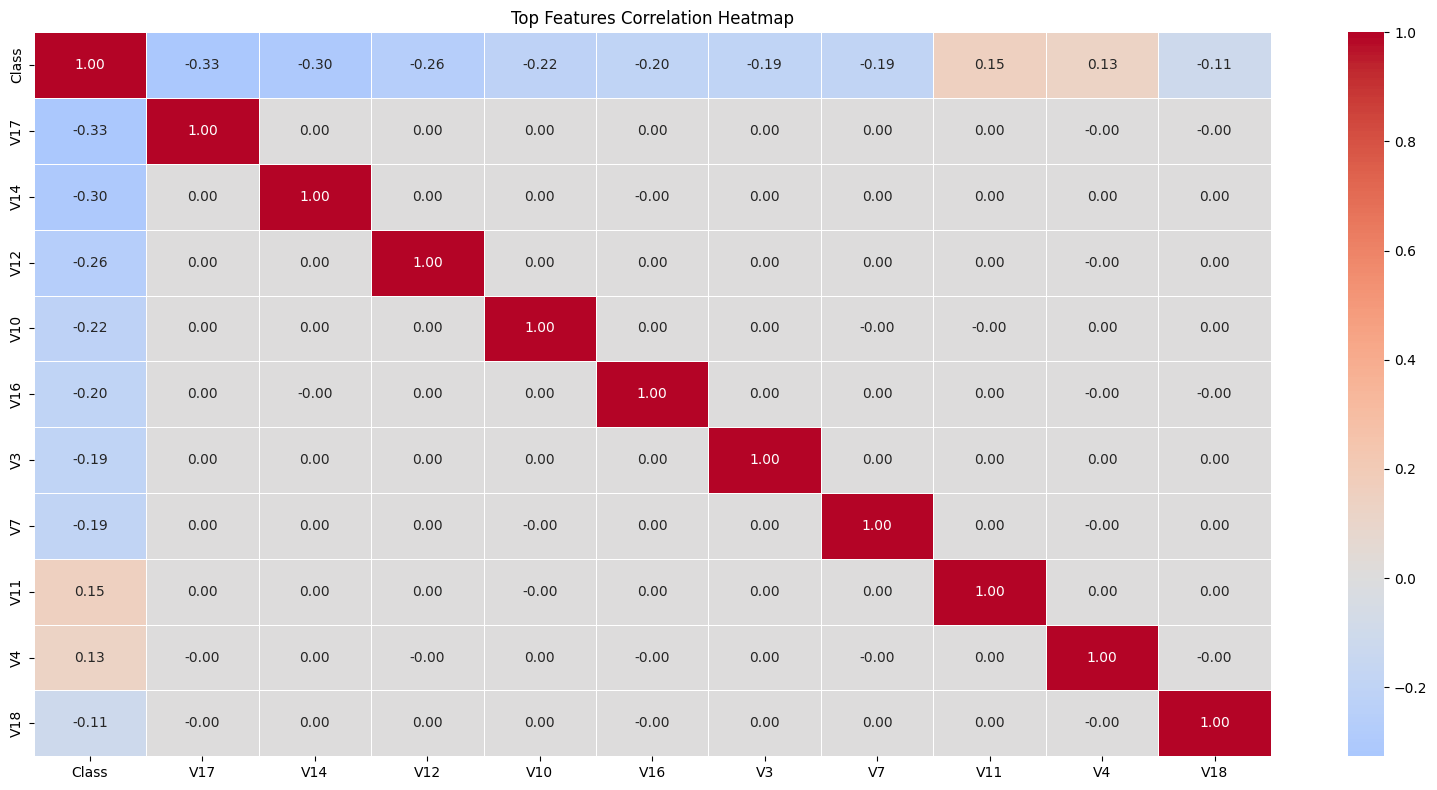

In [11]:
top_features = top_corr.index.tolist()
top_corr_matrix = df[top_features].corr()

plt.figure(figsize=(16, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Top Features Correlation Heatmap")
plt.tight_layout()
plt.show()

# Violin Plots of Top 3 Most Correlated Features

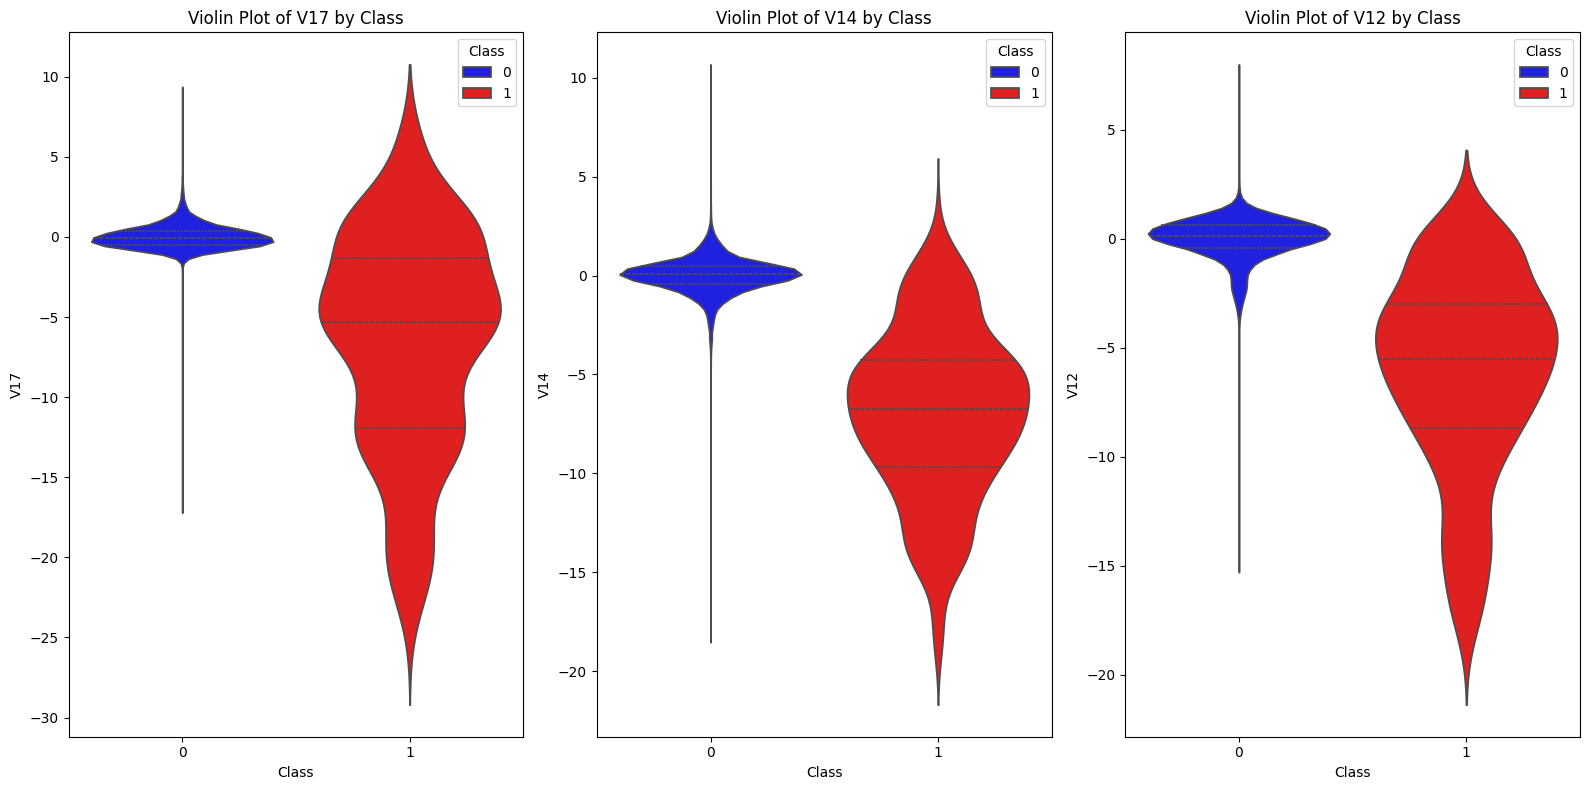

In [12]:
top_corr_features = ['V17', 'V14', 'V12']

plt.figure(figsize=(16, 8))
for i, col in enumerate(top_corr_features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Class', y=col, data=df, hue='Class', palette={0: 'blue', 1: 'red'}, inner='quartile')
    plt.title(f"Violin Plot of {col} by Class")
    plt.xlabel("Class")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Zscore Outliers for Amount

In [13]:
zscores = zscore(df['Amount'])
outlier_mask = np.abs(zscores) > 3
outliers = df[outlier_mask]

print(f"\nNumber of outliers in Amount (Z > 3): {len(outliers)}")
print(f"Outlier percentage: {len(outliers) / len(df) * 100:.2f}%")
outliers[['Amount', 'Class']].sort_values(by='Amount', ascending=False).head(20)


Number of outliers in Amount (Z > 3): 4076
Outlier percentage: 1.43%


,Amount,Class
274771,25691.16,0
58465,19656.53,0
151296,18910.00,0
46841,12910.93,0
54018,11898.09,0
169457,11789.84,0
284249,10199.44,0
227921,10000.00,0
74699,8790.26,0
245474,8787.00,0


# t-SNE Plot

C:\Users\raira\AppData\Local\Temp\ipykernel_21072\3769808518.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(n=300, random_state=42)).reset_index(drop=True)


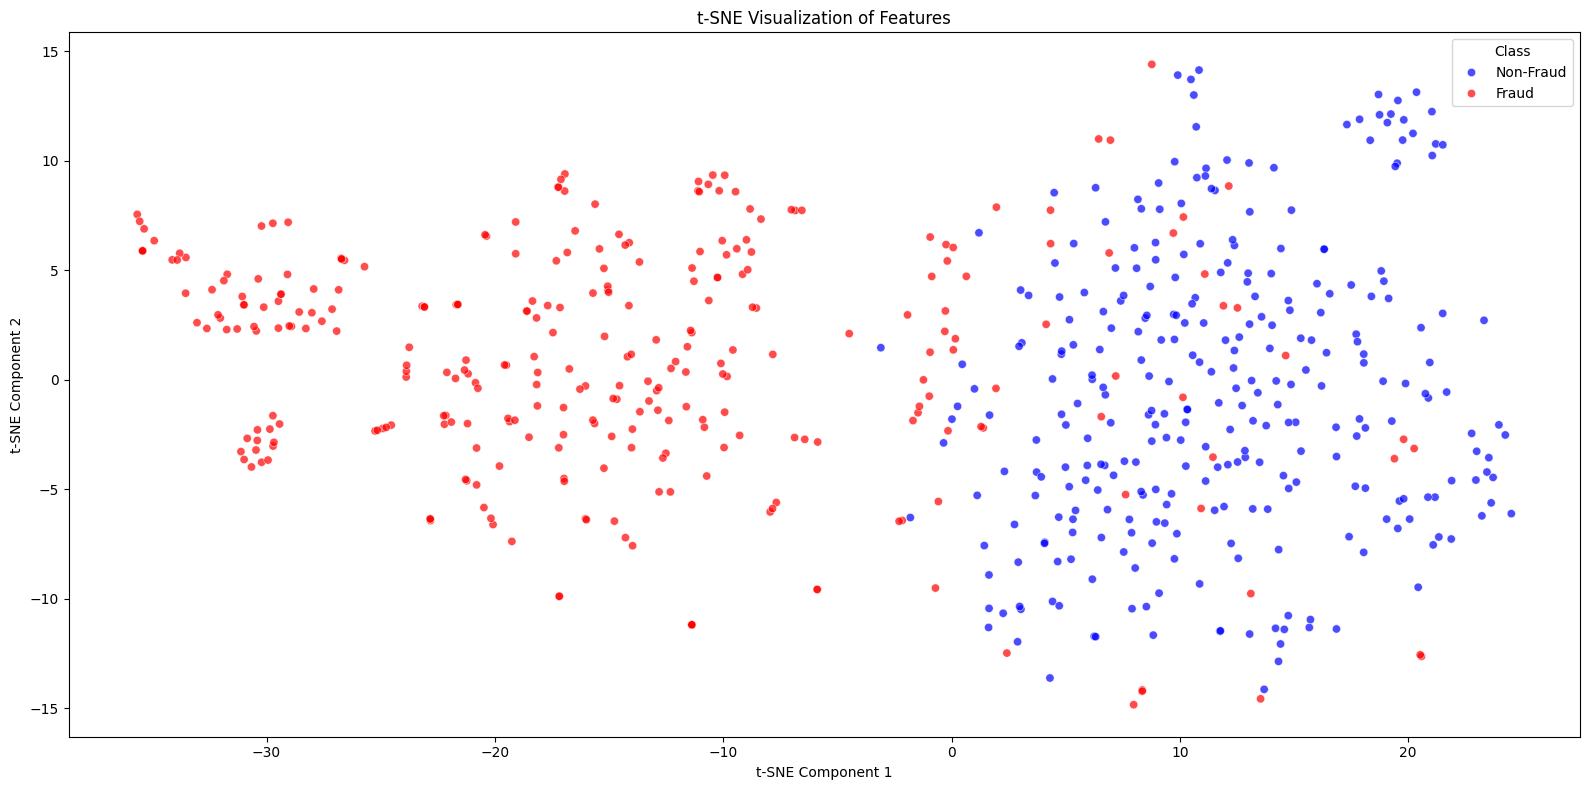

In [14]:
df_sampled = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(n=300, random_state=42)).reset_index(drop=True)
features = df_sampled.drop(columns=['Time', 'Amount', 'Class'])
X_scaled = StandardScaler().fit_transform(features)
y = df_sampled['Class']
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_embed = tsne.fit_transform(X_scaled)
df_sampled['Class_Label'] = df_sampled['Class'].map({0: 'Non-Fraud', 1: 'Fraud'})

plt.figure(figsize=(16, 8))
sns.scatterplot(x=X_embed[:, 0], y=X_embed[:, 1], hue=df_sampled['Class_Label'], palette={'Non-Fraud': 'blue', 'Fraud': 'red'}, alpha=0.7)
plt.title("t-SNE Visualization of Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

# EDA Insights 

- Data is clean and ready to process, containing **no null values** across all columns.

- All features `V1` to `V28` are already **PCA transformed** for confidentiality, except for `Amount` and `Time`. 

- A fraud rate of only **0.173%** shows **severe class imbalance**.

- A **log scaled distribution** of transaction amount reveals a long right tail of high value non-fraud transactions.

- Fraudulent transactions are generally for **smaller to moderate amounts**. 

- Based on **Z-score**, about **1.43%** of the transactions are **outliers** in `Amount`.

- Most of the high value transacitons are **not fraud**, suggesting that high amounts alone are not indicative of fraud.

- Transactions span across all **48 hours**, but there is a concentration of transcations during daylight hours.

- Fraud appears to be more **randomly distributed over time**.

- Fraud is **most correlated (negatively)** with `V17`, `V14`, and `V12`.

- Correlation heatmap confirms **no multicollinearity** amoung top features.

- The **violin plots** show that for `V17`, `V14`, and `V12`, **fraud transcations are heavily skewed toward negative values**, while **legitamate transactions hug 0**, confirming these variables hold **strong discrimatory power**.

- The **t-SNE projection** shows a **clear left vs. right cloud structure** with most **fraud points clustered together**, showing that a **non-linear model** should be able to better find the **decision boundary** beyond a simple linear regression.

## EDA Insights

- **Data Quality**: The dataset contains no missing values, making it ready for immediate processing.
- **Feature Representation**: Features `V1`-`V28` are anonymized via PCA transformation. Only `Time` and `Amount` retain original meaning to protect customer confidentiality.
- **Class Imbalance**: The fraud rate is just **0.173%**, highlighting a severe imbalance that must be addressed during modeling.
- **Transaction Amount**:
    - Shows a heavy **right-skewed distribution**, primarily due to high-value legitimate transactions.
    - Fraudulent transactions tend to involve **lower to moderate amounts**.
    - Z-score analysis indicates ~**1.43%** of transactions are high-value outliers-most of which are **not fraud**.
- **Time-based Trends**:
    - Transactions span across **all 24 hours** with peaks during the day.
    - Fraud occurrences appear more **randomly distributed**, possibly exploiting off-peak hours.
- **Feature Correlations**:
    - Features `V17`, `V14`, and `V12` are the strongest **negatively correlated** with fraud.
    - Additional top correlated features include `V10`, `V16`, `V3`, `V7`, `V11`, `V4`, and `V18`.
    - No strong multicollinearity detected among top features which is ideal for robust modeling.
- **Violin Plot Insights**:
    - `V17`, `V14`, and `V12` show **distinct separation between classes**.
    - Fraud transactions skew toward **negative values**, while non-fraud cases cluster near **zero**, confirming **discriminative power**.
- **t-SNE Projection**:
    - Shows a **clear left-right class separation**, with most **fraud cases forming compact clusters**.
    - Indicates a **non-linear decision boundary**-supporting the use of tree-based or deep models over linear classifiers.

---

*These insights directly informed model design, feature selection, and resampling strategy for fraud detection.*